In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import arima as arima_utils
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX
from importlib import reload

In [100]:
reload(arima_utils)

<module 'arima' from '/Users/david/eafit/proyecto-integrador-semestre-2/notebooks/time_series/arima/arima.py'>

In [101]:
train_df = pd.read_parquet("../../../data/time_series/train_df.parquet").asfreq("D")
validation_df = pd.read_parquet(
    "../../../data/time_series/validation_df.parquet"
).asfreq("D")
test_df = pd.read_parquet("../../../data/time_series/test_df.parquet").asfreq("D")

In [102]:
df = pd.concat([train_df, validation_df, test_df])

In [103]:
arima_order = (0, 1, 3)
seasonal_order = (2, 0, 0, 7)

In [104]:
values = df["gap"].to_numpy()

In [105]:
model = SARIMAX(values, order=arima_order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

In [106]:
model_fit.summary()  # type: ignore

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 5052
Model:             SARIMAX(0, 1, 3)x(2, 0, [], 7)   Log Likelihood              -49353.482
Date:                            Fri, 07 Jun 2024   AIC                          98718.964
Time:                                    15:51:15   BIC                          98758.128
Sample:                                         0   HQIC                         98732.683
                                           - 5052                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6232      0.006   -107.344      0.000      -0.635      -0.612
ma.L2         -0.2073      0.007    -28.468      0.000      -0.222      -0.193
ma.L3          0.0258      0.006      4.592      0.000       0.015       0.037
ar.S.L7        0.2055      0.006     35.839      0.000       0.194       0.217
ar.S.L14       0.0986      0.005     18.066      0.000       0.088       0.109
sigma2      1.888e+07   8.58e-11    2.2e+17      0.000    1.89e+07    1.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            274199.68
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):             843.85   Skew:                             2.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.17e+31. Standard errors may be unstable.
"""

In [107]:
number_of_predictions = 365

In [108]:
for i in range(number_of_predictions):
    prediction = model_fit.forecast()  # type: ignore
    values = np.append(values, prediction.mean())
    model = SARIMAX(values, order=arima_order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

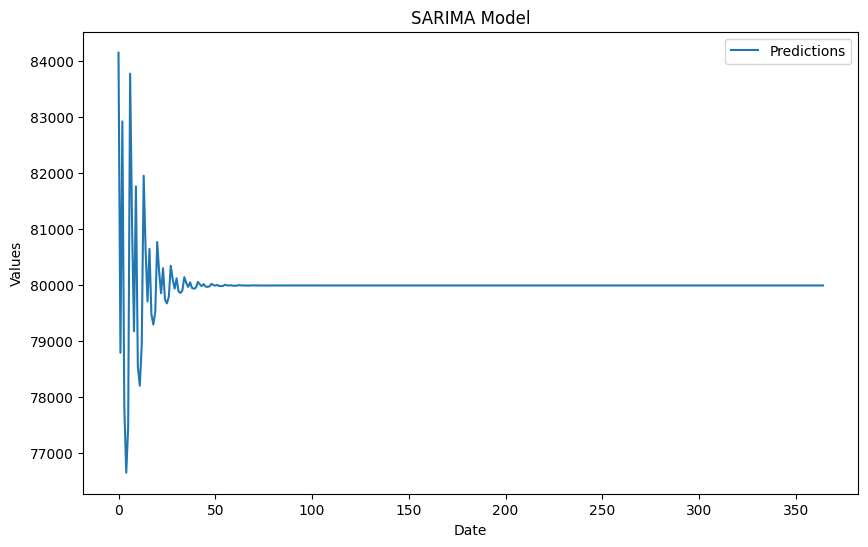

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(values[-number_of_predictions:], label="Predictions")
plt.title("SARIMA Model")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()